In [1]:
#import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To load the dataset
df=pd.read_csv('BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
#To check number of rows and columns
df.shape

(506, 14)

In [4]:
#To get the statistics information about dataset
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
#To check the null values
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

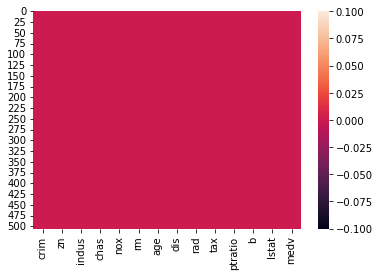

In [6]:
#To visualize the null values
sb.heatmap(df.isnull())
plt.show()

In [7]:
#To check the datatype
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

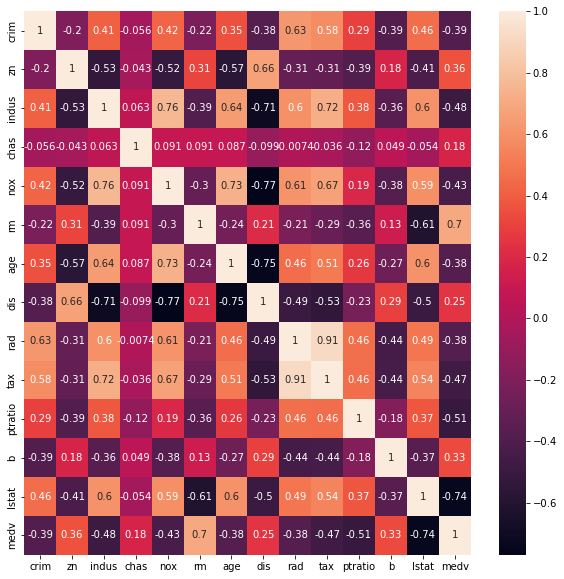

In [8]:
#To check/visualize  the correlation
plt.figure(figsize=(10,10))
sb.heatmap(df.corr(),annot=True)
plt.show()

In [9]:
#From above heatmap we can see the correlation of output[i.e:medv] with others
#So we are going to drop all the columns whose correlation are not good with output
A=df[['crim','zn','chas','nox','age','dis','rad','b']]
df.drop(A,axis=1,inplace=True)

In [10]:
#Now we have dropped all the non correlational column
#We are now dropping the columns which have strong correlation with each other
#So that it wont' affect the predicted output and help to fullfill the assumption
A=df[['indus','rm','tax','ptratio']]
df.drop(A,axis=1,inplace=True)

In [11]:
#So we  are left with one input and one output
#Now we are going to use this data in model making
X=df[['lstat']]
Y=df['medv']

In [12]:
#To split the data into training and testing
#We have to import inbuilt library from sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [13]:
X_train.head()

,lstat
13,8.26
61,14.44
377,21.24
39,4.32
365,7.12


In [14]:
#To do scaling on input data 
#We are going to use standardscalar on dataset for scaling
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [15]:
#To train the data with LinearRegression using inbuilt function
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [16]:
#To fit the data in machine
lr.fit(X_train,Y_train)

LinearRegression()

In [17]:
#To check the slope
print("Slope:",lr.coef_)

Slope: [-6.66258272]


In [18]:
#To check the intercept
print("Intercept",lr.intercept_)

Intercept 22.339830508474574


In [19]:
#To get the predicted output using predict
Y_pred=lr.predict(X_test)

In [20]:
#To create the dataframe of actual output and predicted output
dict={'Actual Output':Y_test,'Predicted Output':Y_pred}
df1=pd.DataFrame(dict)
df1['Input']=X_test
df1

,Actual Output,Predicted Output,Input
307,28.2,27.319149,-0.747356
343,23.9,27.639991,-0.795511
47,16.6,16.988035,0.803261
67,22.0,26.796635,-0.668930
362,20.8,24.880749,-0.381371
...,...,...,...
467,19.1,14.677972,1.149983
95,28.4,28.125838,-0.868433
122,20.5,17.785556,0.683560
260,33.8,25.430764,-0.463924


In [21]:
#To check the training and testing scores
print('Training Score',lr.score(X_train,Y_train))
print('Testing Score',lr.score(X_test,Y_test))

Training Score 0.5467486221534437
Testing Score 0.5349901044757204


In [22]:
#Evaluate the model
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_test,Y_pred)
print("Mean_Squared_Error:",mse)
rmse=np.sqrt(mse)
print("Root_Mean_Squared_Error",rmse)

Mean_Squared_Error: 42.62024347153971
Root_Mean_Squared_Error 6.528418144661057


In [23]:
#To find r2_score
from sklearn.metrics import r2_score
print("The r2_score is :",r2_score(Y_test,Y_pred))
#The r2_score is average not good and not bad too

The r2_score is : 0.5349901044757204


In [24]:
#Now we are going to check the assumption
#As we have drop the columns above of correlated part
#So our first assumption is fulfilled of Multicollinearity

In [25]:
#Taking residual
residual=Y_test-Y_pred
dict={'Residual':residual,'Predicted Output':Y_pred}
df2=pd.DataFrame(dict)
df2.head()

,Residual,Predicted Output
307,0.880851,27.319149
343,-3.739991,27.639991
47,-0.388035,16.988035
67,-4.796635,26.796635
362,-4.080749,24.880749


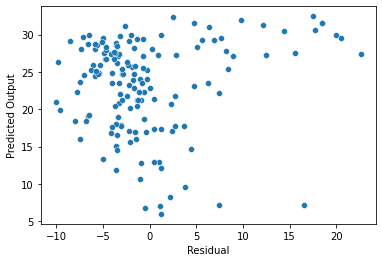

In [26]:
#2nd Assumption
#To check linear regression between residue and y_pred using scatter plot
sb.scatterplot(data=df2,x='Residual',y='Predicted Output')
plt.show()

In [27]:
#In the above plot we can see that there is very low linear regression
#So 2nd assumption is failed
#3rd assumption is also failed because the points are hetroskedastik

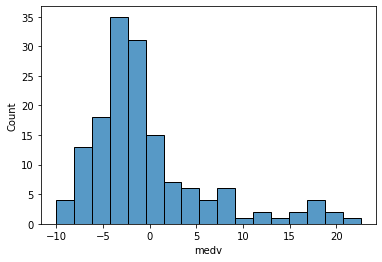

In [28]:
#4th assumption to check normal distribution of data
sb.histplot(data=df,x=residual)
plt.show()
#Here we can see data is not normalized
#So 4th assumption is also failed

In [29]:
#To see the skewness
df2['Residual'].skew()

1.5766932256272943

In [30]:
#So we have to do polynomial linear regression
#Assuming Degree as 2
#Using inbuilt class of Polynomial features
from sklearn.preprocessing import PolynomialFeatures
#Create object of polynomial features with 2 degree
pf=PolynomialFeatures(2)


In [31]:
X_poly=pf.fit_transform(X)
X_poly

array([[ 1.    ,  4.98  , 24.8004],
       [ 1.    ,  9.14  , 83.5396],
       [ 1.    ,  4.03  , 16.2409],
       ...,
       [ 1.    ,  5.64  , 31.8096],
       [ 1.    ,  6.48  , 41.9904],
       [ 1.    ,  7.88  , 62.0944]])

In [32]:
# Split the data
X_train,X_test,Y_train,Y_test=train_test_split(X_poly,Y,test_size=0.3,random_state=1)

In [33]:
#Scaling we do only independent variable not on dependent variable
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)   
#test data we only perform transform method of StandardScaler class
X_test=ss.transform(X_test)  

In [34]:
# create object for LinearRegression class to train the machine
lr=LinearRegression()

In [35]:
#Train the model
lr.fit(X_train,Y_train)

LinearRegression()

In [36]:
# Test the model with 30% data
Y_pred=lr.predict(X_test)

In [37]:
#To check the slope
m=lr.coef_
print("Slope:",m)

Slope: [  0.         -16.52534655  10.27689148]


In [38]:
#To check intercept
c=lr.intercept_
print("Intercept:",c)

Intercept: 22.33983050847456


In [39]:
dict={'Predict output':Y_pred,'Actual Output':Y_test}
df_new=pd.DataFrame(dict)
df_new.head()

,Predict output,Actual Output
307,27.844264,28.2
343,28.425316,23.9
47,14.596553,16.6
67,26.919853,22.0
362,23.762224,20.8


In [40]:
#Find mse and rmse
mse=mean_squared_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
print("Mean_Squared_Error :",mse)
print("Root_Mean_Squared_Error:",rmse)

Mean_Squared_Error : 34.77079728442926
Root_Mean_Squared_Error: 5.896676800065377


In [41]:
#To check the r2score
print("r2_score:",r2_score(Y_test,Y_pred))

r2_score: 0.6206318055567823


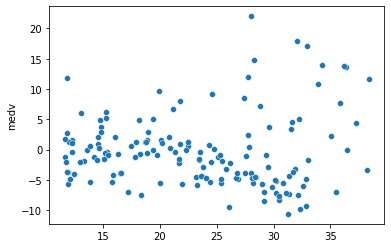

In [42]:
# Now work on remaining 3 assumption, because 1st assumption was already fulfilled earlier
# 1. check Linear relation between input and output 
residual = Y_test-Y_pred
# create scatter plot between Y_pred and residual
sb.scatterplot(Y_pred,residual)
plt.show()

In [43]:
dict={'Y_pred':Y_pred,'residual':residual}
df_new=pd.DataFrame(dict)
df_new.head()

,Y_pred,residual
307,27.844264,0.355736
343,28.425316,-4.525316
47,14.596553,2.003447
67,26.919853,-4.919853
362,23.762224,-2.962224


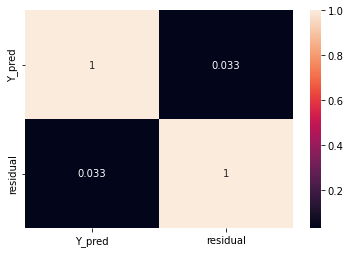

In [44]:
#To check the correlation between residual and y_pred
sb.heatmap(df_new.corr(),annot=True)
plt.show()

1.1771682138007433


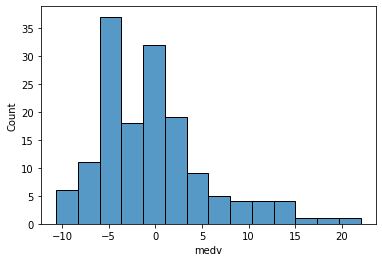

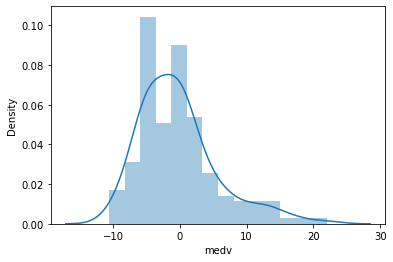

In [45]:
# 3rd assumption will also fail
# 4th assumption : N.D curve
sb.histplot(residual)
print (residual.skew())
plt.show()
# it is positive skewness

#distplot()
sb.distplot(residual)
plt.show()

In [46]:
#Create object of polynomial features with 3 degree
pf=PolynomialFeatures(3)

In [47]:
X_poly=pf.fit_transform(X)
X_poly

array([[  1.      ,   4.98    ,  24.8004  , 123.505992],
       [  1.      ,   9.14    ,  83.5396  , 763.551944],
       [  1.      ,   4.03    ,  16.2409  ,  65.450827],
       ...,
       [  1.      ,   5.64    ,  31.8096  , 179.406144],
       [  1.      ,   6.48    ,  41.9904  , 272.097792],
       [  1.      ,   7.88    ,  62.0944  , 489.303872]])

In [48]:
# Split the data
X_train,X_test,Y_train,Y_test=train_test_split(X_poly,Y,test_size=0.3,random_state=1)

In [49]:
#Scaling we do only independent variable not on dependent variable
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)   
#test data we only perform transform method of StandardScaler class
X_test=ss.transform(X_test)  

In [50]:
# create object for LinearRegression class to train the machine
lr=LinearRegression()

In [51]:
#Train the model
lr.fit(X_train,Y_train)

LinearRegression()

In [52]:
# Test the model with 30% data
Y_pred=lr.predict(X_test)

In [53]:
#To check the slope
m=lr.coef_
print("Slope:",m)

Slope: [  0.         -27.95668143  36.38370691 -15.52365734]


In [54]:
#To check intercept
c=lr.intercept_
print("Intercept:",c)

Intercept: 22.339830508474556


In [55]:
dict={'Predict output':Y_pred,'Actual Output':Y_test}
df_new=pd.DataFrame(dict)
df_new.head()

,Predict output,Actual Output
307,27.206964,28.2
343,27.905271,23.9
47,15.385974,16.6
67,26.123516,22.0
362,22.688096,20.8


In [56]:
#Find mse and rmse
mse=mean_squared_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
print("Mean_Squared_Error :",mse)
print("Root_Mean_Squared_Error:",rmse)

Mean_Squared_Error : 33.58494035695632
Root_Mean_Squared_Error: 5.795251535261978


In [57]:
#To check the r2score
print("r2_score:",r2_score(Y_test,Y_pred))

r2_score: 0.6335701456748806


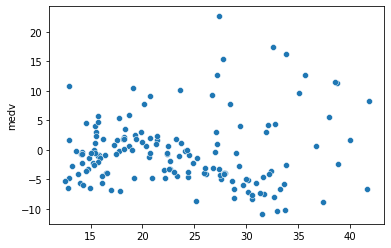

In [58]:
# Now work on remaining 3 assumption, because 1st assumption was already fulfilled earlier
# 1. check Linear relation between input and output 
residual = Y_test-Y_pred
# create scatter plot between Y_pred and residual
sb.scatterplot(Y_pred,residual)
plt.show()

In [59]:
dict={'Y_pred':Y_pred,'residual':residual}
df_new=pd.DataFrame(dict)
df_new.head()

,Y_pred,residual
307,27.206964,0.993036
343,27.905271,-4.005271
47,15.385974,1.214026
67,26.123516,-4.123516
362,22.688096,-1.888096


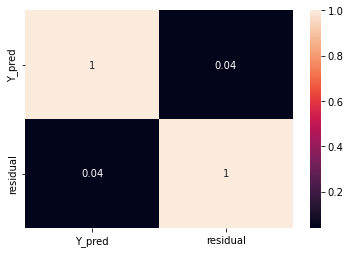

In [60]:
#To check the correlation between residual and y_pred
sb.heatmap(df_new.corr(),annot=True)
plt.show()

1.1331518853405633


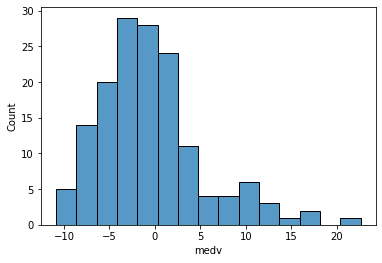

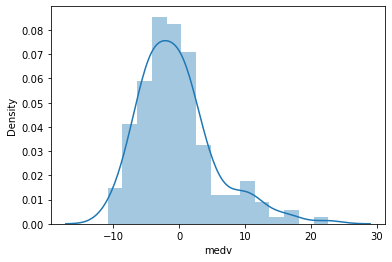

In [61]:
# 3rd assumption will also fail
# 4th assumption : N.D curve
sb.histplot(residual)
print (residual.skew())
plt.show()
# it is positive skewness

#distplot()
sb.distplot(residual)
plt.show()

In [62]:
#Create object of polynomial features with 4 degree
pf=PolynomialFeatures(4)

In [63]:
X_poly=pf.fit_transform(X)
X_poly

array([[1.00000000e+00, 4.98000000e+00, 2.48004000e+01, 1.23505992e+02,
        6.15059840e+02],
       [1.00000000e+00, 9.14000000e+00, 8.35396000e+01, 7.63551944e+02,
        6.97886477e+03],
       [1.00000000e+00, 4.03000000e+00, 1.62409000e+01, 6.54508270e+01,
        2.63766833e+02],
       ...,
       [1.00000000e+00, 5.64000000e+00, 3.18096000e+01, 1.79406144e+02,
        1.01185065e+03],
       [1.00000000e+00, 6.48000000e+00, 4.19904000e+01, 2.72097792e+02,
        1.76319369e+03],
       [1.00000000e+00, 7.88000000e+00, 6.20944000e+01, 4.89303872e+02,
        3.85571451e+03]])

In [64]:
# Split the data
X_train,X_test,Y_train,Y_test=train_test_split(X_poly,Y,test_size=0.3,random_state=1)

In [65]:
#Scaling we do only independent variable not on dependent variable
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)   
#test data we only perform transform method of StandardScaler class
X_test=ss.transform(X_test)  

In [66]:
# create object for LinearRegression class to train the machine
lr=LinearRegression()

In [67]:
#Train the model
lr.fit(X_train,Y_train)

LinearRegression()

In [68]:
# Test the model with 30% data
Y_pred=lr.predict(X_test)

In [69]:
#To check the slope
m=lr.coef_
print("Slope:",m)

Slope: [   0.          -54.62141199  133.67506128 -141.24576826   55.10147792]


In [70]:
#To check intercept
c=lr.intercept_
print("Intercept:",c)

Intercept: 22.339830508474588


In [71]:
dict={'Predict output':Y_pred,'Actual Output':Y_test}
df_new=pd.DataFrame(dict)
df_new.head()

,Predict output,Actual Output
307,26.045504,28.2
343,26.784846,23.9
47,16.606139,16.6
67,24.949835,22.0
362,21.899008,20.8


In [72]:
#Find mse and rmse
mse=mean_squared_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
print("Mean_Squared_Error :",mse)
print("Root_Mean_Squared_Error:",rmse)

Mean_Squared_Error : 33.08908909693794
Root_Mean_Squared_Error: 5.752311630721856


In [73]:
#To check the r2score
print("r2_score:",r2_score(Y_test,Y_pred))

r2_score: 0.6389801509642847


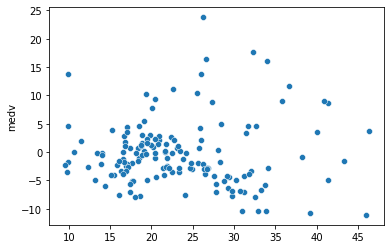

In [74]:
# Now work on remaining 3 assumption, because 1st assumption was already fulfilled earlier
# 1. check Linear relation between input and output 
residual = Y_test-Y_pred
# create scatter plot between Y_pred and residual
sb.scatterplot(Y_pred,residual)
plt.show()

In [75]:
dict={'Y_pred':Y_pred,'residual':residual}
df_new=pd.DataFrame(dict)
df_new.head()

,Y_pred,residual
307,26.045504,2.154496
343,26.784846,-2.884846
47,16.606139,-0.006139
67,24.949835,-2.949835
362,21.899008,-1.099008


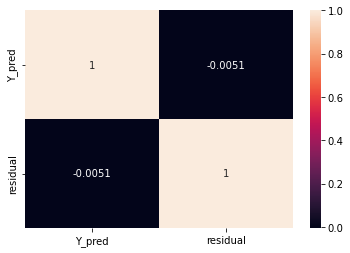

In [76]:
#To check the correlation between residual and y_pred
sb.heatmap(df_new.corr(),annot=True)
plt.show()

1.2017153603704793


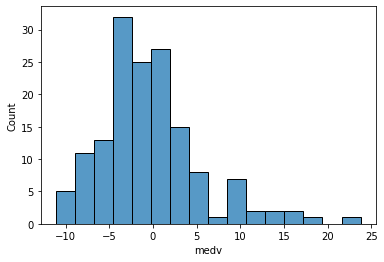

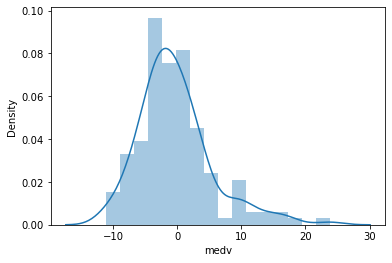

In [77]:
# 3rd assumption will also fail
# 4th assumption : N.D curve
sb.histplot(residual)
print (residual.skew())
plt.show()
# it is positive skewness

#distplot()
sb.distplot(residual)
plt.show()

In [78]:
#Create object of polynomial features with 5 degree
pf=PolynomialFeatures(5)

In [79]:
X_poly=pf.fit_transform(X)
X_poly

array([[1.00000000e+00, 4.98000000e+00, 2.48004000e+01, 1.23505992e+02,
        6.15059840e+02, 3.06299800e+03],
       [1.00000000e+00, 9.14000000e+00, 8.35396000e+01, 7.63551944e+02,
        6.97886477e+03, 6.37868240e+04],
       [1.00000000e+00, 4.03000000e+00, 1.62409000e+01, 6.54508270e+01,
        2.63766833e+02, 1.06298034e+03],
       ...,
       [1.00000000e+00, 5.64000000e+00, 3.18096000e+01, 1.79406144e+02,
        1.01185065e+03, 5.70683768e+03],
       [1.00000000e+00, 6.48000000e+00, 4.19904000e+01, 2.72097792e+02,
        1.76319369e+03, 1.14254951e+04],
       [1.00000000e+00, 7.88000000e+00, 6.20944000e+01, 4.89303872e+02,
        3.85571451e+03, 3.03830303e+04]])

In [80]:
# Split the data
X_train,X_test,Y_train,Y_test=train_test_split(X_poly,Y,test_size=0.3,random_state=1)

In [81]:
#Scaling we do only independent variable not on dependent variable
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)   
#test data we only perform transform method of StandardScaler class
X_test=ss.transform(X_test)  

In [82]:
# create object for LinearRegression class to train the machine
lr=LinearRegression()

In [83]:
#Train the model
lr.fit(X_train,Y_train)

LinearRegression()

In [84]:
# Test the model with 30% data
Y_pred=lr.predict(X_test)

In [85]:
#To check the slope
m=lr.coef_
print("Slope:",m)

Slope: [   0.          -96.32688202  350.18401158 -594.80812672  486.85593811
 -153.53162874]


In [86]:
#To check intercept
c=lr.intercept_
print("Intercept:",c)

Intercept: 22.339830508474755


In [87]:
dict={'Predict output':Y_pred,'Actual Output':Y_test}
df_new=pd.DataFrame(dict)
df_new.head()

,Predict output,Actual Output
307,25.326386,28.2
343,25.985574,23.9
47,16.132932,16.6
67,24.396059,22.0
362,22.078983,20.8


In [88]:
#Find mse and rmse
mse=mean_squared_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
print("Mean_Squared_Error :",mse)
print("Root_Mean_Squared_Error:",rmse)

Mean_Squared_Error : 32.84454482673264
Root_Mean_Squared_Error: 5.731016037905725


In [89]:
#To check the r2score
print("r2_score:",r2_score(Y_test,Y_pred))

r2_score: 0.6416482611456629


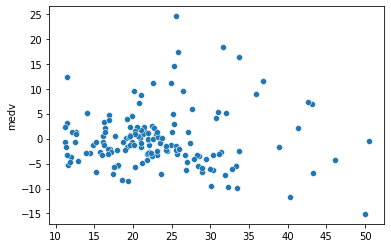

In [90]:
# Now work on remaining 3 assumption, because 1st assumption was already fulfilled earlier
# 1. check Linear relation between input and output 
residual = Y_test-Y_pred
# create scatter plot between Y_pred and residual
sb.scatterplot(Y_pred,residual)
plt.show()

In [91]:
dict={'Y_pred':Y_pred,'residual':residual}
df_new=pd.DataFrame(dict)
df_new.head()

,Y_pred,residual
307,25.326386,2.873614
343,25.985574,-2.085574
47,16.132932,0.467068
67,24.396059,-2.396059
362,22.078983,-1.278983


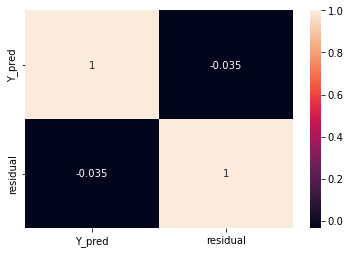

In [92]:
#To check the correlation between residual and y_pred
sb.heatmap(df_new.corr(),annot=True)
plt.show()

1.2279772815311467


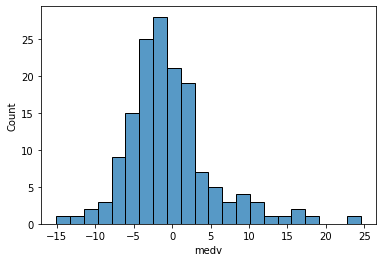

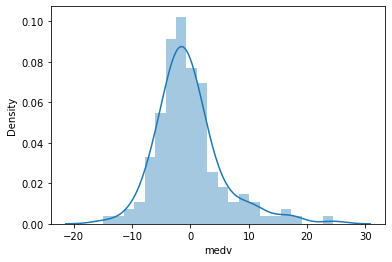

In [93]:
# 3rd assumption will also fail
# 4th assumption : N.D curve
sb.histplot(residual)
print (residual.skew())
plt.show()
# it is positive skewness

#distplot()
sb.distplot(residual)
plt.show()

In [94]:
#Create object of polynomial features with 6 degree
pf=PolynomialFeatures(6)

In [95]:
X_poly=pf.fit_transform(X)
X_poly

array([[1.00000000e+00, 4.98000000e+00, 2.48004000e+01, ...,
        6.15059840e+02, 3.06299800e+03, 1.52537301e+04],
       [1.00000000e+00, 9.14000000e+00, 8.35396000e+01, ...,
        6.97886477e+03, 6.37868240e+04, 5.83011571e+05],
       [1.00000000e+00, 4.03000000e+00, 1.62409000e+01, ...,
        2.63766833e+02, 1.06298034e+03, 4.28381075e+03],
       ...,
       [1.00000000e+00, 5.64000000e+00, 3.18096000e+01, ...,
        1.01185065e+03, 5.70683768e+03, 3.21865645e+04],
       [1.00000000e+00, 6.48000000e+00, 4.19904000e+01, ...,
        1.76319369e+03, 1.14254951e+04, 7.40372084e+04],
       [1.00000000e+00, 7.88000000e+00, 6.20944000e+01, ...,
        3.85571451e+03, 3.03830303e+04, 2.39418279e+05]])

In [96]:
# Split the data
X_train,X_test,Y_train,Y_test=train_test_split(X_poly,Y,test_size=0.3,random_state=1)

In [97]:
#Scaling we do only independent variable not on dependent variable
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)   
#test data we only perform transform method of StandardScaler class
X_test=ss.transform(X_test)  

In [98]:
# create object for LinearRegression class to train the machine
lr=LinearRegression()

In [99]:
#Train the model
lr.fit(X_train,Y_train)

LinearRegression()

In [100]:
# Test the model with 30% data
Y_pred=lr.predict(X_test)

In [101]:
#To check the slope
m=lr.coef_
print("Slope:",m)

Slope: [    0.          -130.13853629   579.45494786 -1271.20310878
  1513.49648047  -932.28728313   233.07036801]


In [102]:
#To check intercept
c=lr.intercept_
print("Intercept:",c)

Intercept: 22.339830508475018


In [103]:
dict={'Predict output':Y_pred,'Actual Output':Y_test}
df_new=pd.DataFrame(dict)
df_new.head()

,Predict output,Actual Output
307,25.255535,28.2
343,25.844442,23.9
47,15.737684,16.6
67,24.437415,22.0
362,22.392898,20.8


In [104]:
#Find mse and rmse
mse=mean_squared_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
print("Mean_Squared_Error :",mse)
print("Root_Mean_Squared_Error:",rmse)

Mean_Squared_Error : 33.043265826336565
Root_Mean_Squared_Error: 5.74832721983853


In [105]:
#To check the r2score
print("r2_score:",r2_score(Y_test,Y_pred))

r2_score: 0.6394801076172578


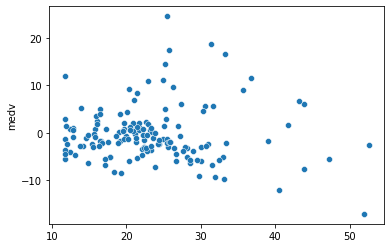

In [106]:
# Now work on remaining 3 assumption, because 1st assumption was already fulfilled earlier
# 1. check Linear relation between input and output 
residual = Y_test-Y_pred
# create scatter plot between Y_pred and residual
sb.scatterplot(Y_pred,residual)
plt.show()

In [107]:
dict={'Y_pred':Y_pred,'residual':residual}
df_new=pd.DataFrame(dict)
df_new.head()

,Y_pred,residual
307,25.255535,2.944465
343,25.844442,-1.944442
47,15.737684,0.862316
67,24.437415,-2.437415
362,22.392898,-1.592898


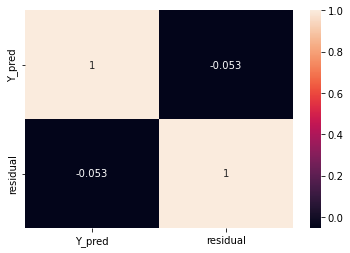

In [108]:
#To check the correlation between residual and y_pred
sb.heatmap(df_new.corr(),annot=True)
plt.show()

1.2143570936125903


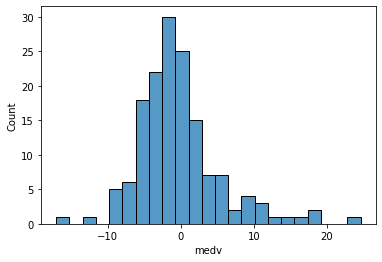

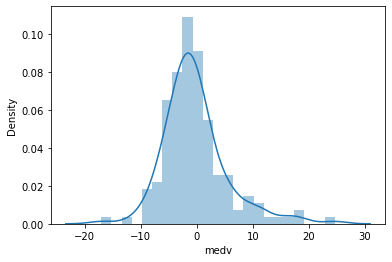

In [109]:
# 3rd assumption will also fail
# 4th assumption : N.D curve
sb.histplot(residual)
print (residual.skew())
plt.show()
# it is positive skewness

#distplot()
sb.distplot(residual)
plt.show()

In [ ]:
#Conclusion:-
#We go with polynomial regression till degree=6
#If the assumption is not fulfill then we have to do regularisation